### Building Basic LeNet for MNIST
    1. Make sure to run the helper functions first

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B426-88EF

 Directory of C:\Users\Baron\Desktop\EE_297_Repo\EE_297\ML_PATH_EE297\EE297_env\projects

04/05/2025  04:17 PM    <DIR>          .
04/05/2025  04:17 PM    <DIR>          ..
04/05/2025  04:17 PM    <DIR>          .ipynb_checkpoints
03/23/2025  01:13 PM    <DIR>          Archive
04/05/2025  04:17 PM               100 conv1_biases.h
04/05/2025  04:17 PM             2,547 conv1_weights.h
04/05/2025  04:17 PM             7,838 img_5.txt
04/05/2025  04:17 PM           138,859 Lenet Design.ipynb
04/05/2025  04:17 PM            42,485 lenet_model.png
03/02/2025  05:03 PM    <DIR>          project_1_led_blink
               5 File(s)        191,829 bytes
               5 Dir(s)  100,163,399,680 bytes free


In [3]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\projects'

In [4]:
# Main Imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import numpy as np

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
tf.keras.backend.set_floatx('float32')
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [7]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [8]:
# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

#For Confusion Matrix
y_test_raw = y_test

# Convers the output data to categorical Data.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

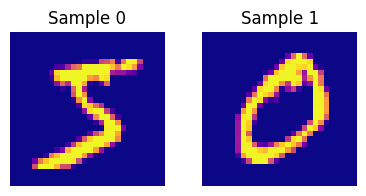

In [11]:
show_sample_images(x_train, 2)

In [12]:
# Build LeNet model with explicit dtype
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(6, 5), activation='relu', input_shape=(28, 28, 1),
                  padding='same', dtype='float32'),
    layers.AveragePooling2D(pool_size=(2, 2), dtype='float32'),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu', dtype='float32'),
    layers.AveragePooling2D(pool_size=(2, 2), dtype='float32'),
    layers.Flatten(dtype='float32'),
    layers.Dense(120, activation='relu', dtype='float32'),
    layers.Dense(84, activation='relu', dtype='float32'),
    layers.Dense(10, activation='softmax', dtype='float32')
])

In [13]:
#plot_model(model, to_file='lenet_model.png', show_shapes=True, show_layer_names=True)

In [14]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 13s 28ms/step - loss: 0.3946 - accuracy: 0.8880 - val_loss: 0.1190 - val_accuracy: 0.9672
Epoch 2/10
422/422 [==============================] - 11s 27ms/step - loss: 0.1158 - accuracy: 0.9657 - val_loss: 0.0748 - val_accuracy: 0.9800
Epoch 3/10
422/422 [==============================] - 12s 28ms/step - loss: 0.0830 - accuracy: 0.9740 - val_loss: 0.0701 - val_accuracy: 0.9813
Epoch 4/10
422/422 [==============================] - 12s 28ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 0.0590 - val_accuracy: 0.9842
Epoch 5/10
422/422 [==============================] - 12s 29ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0513 - val_accuracy: 0.9867
Epoch 6/10
422/422 [==============================] - 12s 29ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0570 - val_accuracy: 0.9840
Epoch 7/10
422/422 [==============================] - 12s 28ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0450 - val_accuracy:

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0370 - accuracy: 0.9880
Test accuracy: 0.9880


313/313 [==============================] - 2s 6ms/step


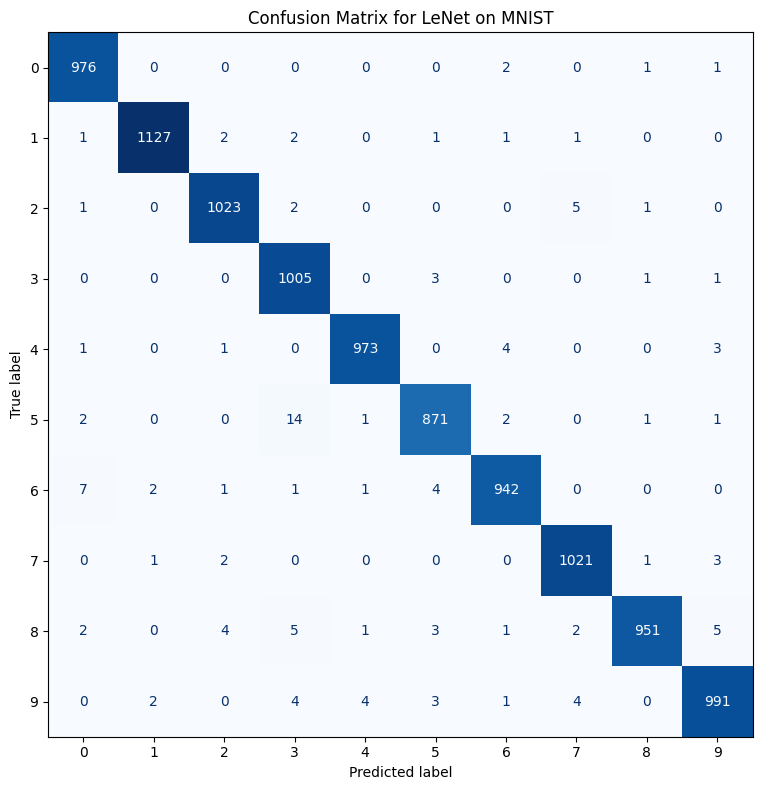

In [17]:
#Confusion Matrix
# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Use y_test (not y_test_cat) for the confusion matrix
cm = confusion_matrix(y_test_raw, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# Display it
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix for LeNet on MNIST")
plt.tight_layout()
plt.show()

In [18]:
for layer in model.layers:
    has_weights = "✅" if layer.get_weights() else "❌"
    print(f"{layer.name:20s} | Has weights? {has_weights}")

conv2d               | Has weights? ✅
average_pooling2d    | Has weights? ❌
conv2d_1             | Has weights? ✅
average_pooling2d_1  | Has weights? ❌
flatten              | Has weights? ❌
dense                | Has weights? ✅
dense_1              | Has weights? ✅
dense_2              | Has weights? ✅


In [19]:
# Extract The Weights
x = 0
for layer in model.layers:
    if layer.get_weights():
        print(x)
        w, b = layer.get_weights()
        print(f"{layer.name} weights shape: {w.shape}")
        print(f"{layer.name} biases shape: {b.shape}")
        x+=1

0
conv2d weights shape: (6, 5, 1, 6)
conv2d biases shape: (6,)
1
conv2d_1 weights shape: (5, 5, 6, 16)
conv2d_1 biases shape: (16,)
2
dense weights shape: (400, 120)
dense biases shape: (120,)
3
dense_1 weights shape: (120, 84)
dense_1 biases shape: (84,)
4
dense_2 weights shape: (84, 10)
dense_2 biases shape: (10,)


In [21]:

#layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding='same', dtype='float32')
weights = model.get_weights()
conv1_weights = weights[0]
conv1_biases = weights[1]

conv2_weights = weights[2]
conv2_biases = weights[3]

fc1_weights = weights[4]
fc1_biases = weights[5]

fc2_weights = weights[6]
fc2_biases = weights[7]

fc3_weights = weights[8]
fc3_biases = weights[9]

#print(conv1_weights)

In [30]:
#Convert the current weights and biases to header files for HLS env
import numpy as np

# Load trained weights
conv1_weights = weights[0]  # shape: (6, 5, 1, 6)
                            # shape: (i, j, 1, k)   (For the for loops)                         
conv1_biases = weights[1]   # shape: (6,)

# Manually save the weights as c header files: 
# Export as C header
## ---------------------------- ** CONV1 ** ---------------------------------------
with open("conv1_weights.h", "w") as f:
    f.write("float conv1_weights[6][5][1][6] = {\n")
    for i in range(6):
        f.write("  {\n")
        for j in range(5):
            f.write("    {")
            f.write(", ".join(f"{conv1_weights[i][j][0][k]:.8f}" for k in range(6)))
            f.write("},\n")
        f.write("  },\n")
    f.write("};\n")

with open("conv1_biases.h", "w") as f:
    f.write("float conv1_biases[6] = {")
    f.write(", ".join(f"{b:.8f}" for b in conv1_biases))
    f.write("};\n")
## ---------------------------- ** COVN2 ** ---------------------------------------
# Load trained weights
conv2_weights = weights[2]  # shape: (6, 5, 1, 6)
                            # shape: (i, j, 1, k)   (For the for loops)                         
conv2_biases = weights[3]   # shape: (6,)

with open("conv2_weights.h", "w") as f:
    f.write("float conv1_weights[5][5][6][16] = {\n")
    for i in range(6):
        f.write("  {\n")
        for j in range(5):
            f.write("    {")
            f.write(", ".join(f"{conv1_weights[i][j][0][k]:.8f}" for k in range(6)))
            f.write("},\n")
        f.write("  },\n")
    f.write("};\n")

with open("conv2_biases.h", "w") as f:
    f.write("float conv1_biases[6] = {")
    f.write(", ".join(f"{b:.8f}" for b in conv1_biases))
    f.write("};\n")

In [ ]:
 Save weights using the same formatting style you used for conv1

# Save conv2_weights: shape (5, 5, 6, 16)
with open("/mnt/data/conv2_weights.h", "w") as f:
    f.write("float conv2_weights[5][5][6][16] = {\n")
    for i in range(5):
        f.write("  {\n")
        for j in range(5):
            f.write("    {\n")
            for k in range(6):
                line = "      {" + ", ".join(f"{conv2_weights[i][j][k][m]:.8f}" for m in range(16)) + "},\n"
                f.write(line)
            f.write("    },\n")
        f.write("  },\n")
    f.write("};\n")

# Save conv2_biases: shape (16,)
with open("/mnt/data/conv2_biases.h", "w") as f:
    f.write("float conv2_biases[16] = {")
    f.write(", ".join(f"{b:.8f}" for b in conv2_biases))
    f.write("};\n")

# Save fc1_weights: shape (400, 120)
with open("/mnt/data/fc1_weights.h", "w") as f:
    f.write("float fc1_weights[400][120] = {\n")
    for i in range(400):
        f.write("  {" + ", ".join(f"{fc1_weights[i][j]:.8f}" for j in range(120)) + "},\n")
    f.write("};\n")

# Save fc1_biases: shape (120,)
with open("/mnt/data/fc1_biases.h", "w") as f:
    f.write("float fc1_biases[120] = {")
    f.write(", ".join(f"{b:.8f}" for b in fc1_biases))
    f.write("};\n")

# Save fc2_weights: shape (120, 84)
with open("/mnt/data/fc2_weights.h", "w") as f:
    f.write("float fc2_weights[120][84] = {\n")
    for i in range(120):
        f.write("  {" + ", ".join(f"{fc2_weights[i][j]:.8f}" for j in range(84)) + "},\n")
    f.write("};\n")

# Save fc2_biases: shape (84,)
with open("/mnt/data/fc2_biases.h", "w") as f:
    f.write("float fc2_biases[84] = {")
    f.write(", ".join(f"{b:.8f}" for b in fc2_biases))
    f.write("};\n")

# Save fc3_weights: shape (84, 10)
with open("/mnt/data/fc3_weights.h", "w") as f:
    f.write("float fc3_weights[84][10] = {\n")
    for i in range(84):
        f.write("  {" + ", ".join(f"{fc3_weights[i][j]:.8f}" for j in range(10)) + "},\n")
    f.write("};\n")

# Save fc3_biases: shape (10,)
with open("/mnt/data/fc3_biases.h", "w") as f:
    f.write("float fc3_biases[10] = {")
    f.write(", ".join(f"{b:.8f}" for b in fc3_biases))
    f.write("};\n")

### Helper Functions

In [10]:
def show_sample_images(x_data, n=5):
    """
    Display the first `n` images in the dataset as heatmaps.
    
    Args:
        x_data (numpy.ndarray): The dataset (e.g., x_train).
        n (int): Number of images to display (default 5).
    """
    plt.figure(figsize=(n * 2, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(x_data[i].squeeze(), cmap='plasma')  # squeeze in case shape is (28, 28, 1)
        plt.axis('off')
        plt.title(f"Sample {i}")
    plt.tight_layout()
    plt.show()

In [23]:
## Convert the current img to normalized text file values 
from PIL import Image
import numpy as np

img_5 = Image.open("C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\pictures\\img_5.jpg").convert("L").resize((28, 28))
arr = np.asarray(img_5).astype('float32') / 255.0
# Save as a flat .txt file
arr.tofile("img_5.txt", sep="\n", format="%.6f")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_full_lenet_neuron_diagram():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Full neuron counts for each major layer
    layers = [
        {"label": "Input Layer\n28x28", "x": 1, "neurons": 10},
        {"label": "Conv2D\n6@28x28", "x": 3, "neurons": 6},
        {"label": "AvgPool\n6@14x14", "x": 4.5, "neurons": 6},
        {"label": "Conv2D\n16@10x10", "x": 6, "neurons": 8},
        {"label": "AvgPool\n16@5x5", "x": 7.5, "neurons": 8},
        {"label": "Flatten\n400", "x": 9, "neurons": 10},
        {"label": "Dense\n120", "x": 11, "neurons": 10},
        {"label": "Dense\n84", "x": 13, "neurons": 10},
        {"label": "Output\n10", "x": 15, "neurons": 10}
    ]

    # Draw neurons
    for layer in layers:
        x = layer["x"]
        n = layer["neurons"]
        spacing = 8.0 / max(n, 1)
        offset = (10 - (n * spacing)) / 2
        for i in range(n):
            y = 9 - (i * spacing + offset)
            circle = plt.Circle((x, y), 0.25, color='white', ec='black', zorder=3)
            ax.add_patch(circle)

        # Label each layer
        ax.text(x, 9.5, layer["label"], ha='center', fontsize=10, fontweight='bold')

    # Draw full connections (dense) between adjacent layers
    for i in range(len(layers) - 1):
        x1, n1 = layers[i]["x"], layers[i]["neurons"]
        x2, n2 = layers[i+1]["x"], layers[i+1]["neurons"]
        spacing1 = 8.0 / max(n1, 1)
        spacing2 = 8.0 / max(n2, 1)
        offset1 = (10 - (n1 * spacing1)) / 2
        offset2 = (10 - (n2 * spacing2)) / 2
        for j in range(n1):
            y1 = 9 - (j * spacing1 + offset1)
            for k in range(n2):
                y2 = 9 - (k * spacing2 + offset2)
                ax.plot([x1 + 0.25, x2 - 0.25], [y1, y2], 'gray', linewidth=0.3, zorder=1)

    plt.title("LeNet Architecture — Full Neuron-Level Visualization", fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def visualize_conv2d_operation():
    fig, ax = plt.subplots(figsize=(28, 28))

    # Create a fake 8x8 input image
    input_image = np.arange(784).reshape(28, 28)

    # Simulated 5x5 filter kernel (not showing values, just visualization)
    filter_size = 5
    stride = 1
    start_x, start_y = 1, 1  # where the filter is "sliding" over

    ax.imshow(input_image, cmap='gray', alpha=0.5)

    # Draw the filter sliding position (5x5 square)
    rect = patches.Rectangle((start_y-0.5, start_x-0.5), filter_size, filter_size, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Annotate pixels
    for i in range(28):
        for j in range(28):
            ax.text(j, i, str(input_image[i, j]), ha='center', va='center', fontsize=8)

    ax.set_title("Example: A 5x5 Filter Sliding Over an 8x8 Image")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_conv2d_operation()
